In [69]:
import os
import pandas as pd

# Define the folder path where all the Excel files are stored
folder_path = r"C:\Users\KabeerMotwani\OneDrive - Prime Trading Group\work\alarm report from outlook"

# Initialize an empty list to store DataFrames
all_dataframes = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".XLS"):  # Only process .XLS files
        file_path = os.path.join(folder_path, file_name)
        try:
            # Attempt to read the file with xlrd engine
            df = pd.read_excel(file_path, engine='xlrd')
            if not df.empty:  # Ensure the DataFrame is not empty
                all_dataframes.append(df)
                print(f"Successfully loaded: {file_name} - {df.shape[0]} rows")
            else:
                print(f"File is empty: {file_name}")
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

# Combine all the DataFrames into a single DataFrame
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\nCombined DataFrame created with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
    

else:
    print("\nNo valid DataFrames were found to combine.")

Successfully loaded: s49-638460873411201718.XLS - 20359 rows
Successfully loaded: s49-638461737405002388.XLS - 23937 rows
Successfully loaded: s49-638462601399202060.XLS - 25809 rows
Successfully loaded: s49-638463465393240742.XLS - 26860 rows
Successfully loaded: s49-638464329427647228.XLS - 20522 rows
Successfully loaded: s49-638465193417659408.XLS - 25500 rows
Successfully loaded: s49-638466057385413024.XLS - 27301 rows
Successfully loaded: s49-638466921344391949.XLS - 20251 rows
Successfully loaded: s49-638467785405766226.XLS - 20174 rows
Successfully loaded: s49-638468649379425678.XLS - 25685 rows
Successfully loaded: s49-638471241428368507.XLS - 21981 rows
Successfully loaded: s49-638472105408768536.XLS - 22774 rows
Successfully loaded: s49-638472969410716771.XLS - 24460 rows
Successfully loaded: s49-638473833424073473.XLS - 24995 rows
Successfully loaded: s49-638474697364101268.XLS - 29213 rows
Successfully loaded: s49-638475561397646922.XLS - 28294 rows
Successfully loaded: s49

In [72]:
# Convert the 'Event Date' column to datetime using dd/mm/yyyy format
event_dates = pd.to_datetime(combined_df['Event Date'], format='%d/%m/%Y', errors='coerce')

# Determine the minimum and maximum dates
min_date = event_dates.min()
max_date = event_dates.max()

print("Date range:", min_date.strftime('%d/%m/%Y'), "to", max_date.strftime('%d/%m/%Y'))

Date range: 14/03/2024 to 05/02/2025


In [77]:
print(combined_df.columns.tolist())

['Site Name', 'Post Code', 'Link Account', 'Event Date', 'Event Time', 'Event Detail', 'Resolution', 'Handling Time', 'Installer', 'Operator']


In [86]:
filtered_combined_df = combined_df[
    combined_df["Handling Time"].notna() &
    (combined_df["Handling Time"] != "") &
    (combined_df["Link Account"] == "George Leslie")
]
filtered_combined_df.head()

,Site Name,Post Code,Link Account,Event Date,Event Time,Event Detail,Resolution,Handling Time,Installer,Operator
15277,Elvanfoot Sub-Station TM155D,ML12 6TE,George Leslie,14/03/2024,18:43:05,Line Crossed T:TM155D(1) A:1 C:13 Cam 13 2024/...,Staff Leaving site late,00:12:22,Prime Secure,RK
15279,Elvanfoot Sub-Station TM155D,ML12 6TE,George Leslie,14/03/2024,21:37:30,Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...,No Visible Cause,00:12:59,Prime Secure,DA
15280,Elvanfoot Sub-Station TM155D,ML12 6TE,George Leslie,15/03/2024,00:21:27,Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...,Environmental Conditions,00:10:24,Prime Secure,DA
15282,Elvanfoot Sub-Station TM155D,ML12 6TE,George Leslie,15/03/2024,02:32:38,Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...,No Visible Cause,00:01:22,Prime Secure,DA
15283,Elvanfoot Sub-Station TM155D,ML12 6TE,George Leslie,15/03/2024,04:20:08,Line Crossed T:TM155D(1) A:1 C:12 Cam 12 2024/...,Environmental Conditions,00:00:40,Prime Secure,SE


                                          Site Name Event Date_dt  row_count  \
18                      Afton Peatland Regeneration    2024-11-07          7   
127                              Blairlinn Cottages    2024-09-20         10   
150                                 Bleachfield SPS    2024-03-19         24   
190                                 Braco BTP TA315    2024-08-14         14   
274                      Bridge of Weir Pipe Bridge    2024-11-24         30   
320                                    Camp Slipway    2024-07-06         68   
518             Camps Water Reservior(Camp Slipway)    2024-08-22         42   
579             Camps Water Reservoir(Camp Slipway)    2024-11-30         21   
631                                    Conon Avenue    2024-11-10         90   
778                                  Daer Reservoir    2024-09-29         34   
861                                   Darndaff Road    2024-05-28         41   
867                                 Down

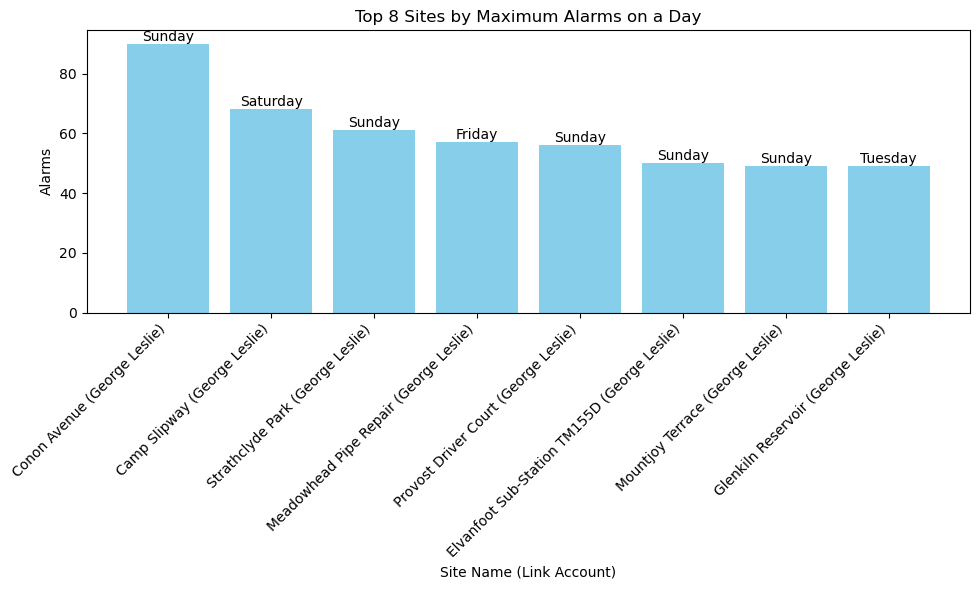

In [105]:
# Ensure the Event Date_dt column exists
if "Event Date_dt" not in filtered_combined_df.columns:
    filtered_combined_df["Event Date_dt"] = pd.to_datetime(filtered_combined_df["Event Date"], format='%d/%m/%Y', errors='coerce')

# Count the number of rows per site per day
daily_rows = filtered_combined_df.groupby(["Site Name", "Event Date_dt"]).size().reset_index(name="row_count")

# (Optional) add the day of the week for context
daily_rows["day_of_week"] = daily_rows["Event Date_dt"].dt.day_name()

# For each unique site, select the day with the maximum number of rows
max_rows_per_site = daily_rows.loc[daily_rows.groupby("Site Name")["row_count"].idxmax()]

print(max_rows_per_site)
# Select top 8 sites by maximum alarms (i.e. row_count)
top8 = max_rows_per_site.sort_values(by="row_count", ascending=False).head(8)

# Retrieve a representative Link Account for each site (using the first occurrence)
link_accounts = filtered_combined_df.groupby("Site Name")["Link Account"].first().reset_index()
top8 = top8.merge(link_accounts, on="Site Name", how="left")

# Create combined labels "Site Name (Link Account)"
labels = top8.apply(lambda row: f"{row['Site Name']} ({row['Link Account']})", axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, top8["row_count"], color='skyblue')
plt.xlabel("Site Name (Link Account)")
plt.ylabel("Alarms")
plt.title("Top 8 Sites by Maximum Alarms on a Day")
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the day of week on top
for bar, day in zip(bars, top8["day_of_week"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, day, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [88]:
# Define the target list of site names
target_sites = [
    "Gladhouse Reservoir",
    "Prestwick Promenade",
    "Conan Avenue",
    "Muirhead Reservoir",
    "Provost Driver Court",
    "Ross Priory WTW",
    "Stafflar DSR",
    "Leigh Park",
    "Kennacraig Ferry Terminal",
    "Palnackie Harbour",
    "Glenburn Reservoir",
    "Elvinfoot Substation",
    "Meadowhead Pipe Repair",
    "Moffat Substation",
    "Camps Water Reservoir",
    "Camp Slipway",
    "Cowgill SL Works",
    "118 Beith Street",
    "Winterhope Reservoir",
    "Scotswood Busby",
    "Bentincks Drive",
    "Wishaw Road",
    "Touch Reservoir",
    "Glenkiln Reservoir",
    "Richmond Laundry",
    "Loch Katrine (Stirling)",
    "Mountjoy Terrace",
    "Springburn Park",
    "Selkirk",
    "Strathclyde Park",
    "Roughrigg Road",
    "Bleachfield SPS",
    "Loch Katrine Woodlands Experience",
    "Preston DSR",
    "Afton Peatland Regeneration"
]

# Filter the DataFrame based on the Site Name column and the target sites list
matching_sites = filtered_combined_df[filtered_combined_df["Site Name"].isin(target_sites)]

# Count the number of unique site names that match the criteria
print("Number of matching sites:", matching_sites["Site Name"].nunique())

Number of matching sites: 14


In [89]:
matched_site_names = matching_sites['Site Name'].unique()
print("Matched Site Names:")
for site in matched_site_names:
    print(site)

unmatched_sites = set(target_sites) - set(matched_site_names)
print("\nTarget sites that did not match:")
for site in unmatched_sites:
    print(site)

Matched Site Names:
Strathclyde Park
Bleachfield SPS
Palnackie Harbour
Camp Slipway
Ross Priory WTW
Provost Driver Court
Glenkiln Reservoir
Mountjoy Terrace
Touch Reservoir
Wishaw Road
Meadowhead Pipe Repair
Afton Peatland Regeneration
Gladhouse Reservoir
Scotswood Busby

Target sites that did not match:
118 Beith Street
Loch Katrine (Stirling)
Bentincks Drive
Prestwick Promenade
Leigh Park
Glenburn Reservoir
Camps Water Reservoir
Kennacraig Ferry Terminal
Roughrigg Road
Winterhope Reservoir
Richmond Laundry
Loch Katrine Woodlands Experience
Selkirk
Conan Avenue
Stafflar DSR
Springburn Park
Elvinfoot Substation
Preston DSR
Muirhead Reservoir
Cowgill SL Works
Moffat Substation


In [ ]:
# If not already computed, add Event Date_dt column converting Event Date to datetime if necessary
if "Event Date_dt" not in matching_sites.columns:
    matching_sites["Event Date_dt"] = pd.to_datetime(matching_sites["Event Date"], format='%d/%m/%Y', errors='coerce')

# Count rows per site per day (this count represents the number of rows for that day)
daily_counts_sites = matching_sites.groupby(["Site Name", "Event Date_dt"]).size().reset_index(name="row_count")

# Optionally, add the day of week for context
daily_counts_sites["day_of_week"] = daily_counts_sites["Event Date_dt"].dt.day_name()

# For each site, select the day with the maximum number of rows
max_per_site = daily_counts_sites.loc[daily_counts_sites.groupby("Site Name")["row_count"].idxmax(),
                                        ["Site Name", "Event Date_dt", "day_of_week", "row_count"]]

print(max_per_site)

KeyError: 'Event Date_dt'

In [90]:
# Convert Event Date to datetime and extract day of week if not already converted
filtered_combined_df['Event Date_dt'] = pd.to_datetime(filtered_combined_df['Event Date'], format='%d/%m/%Y', errors='coerce')
filtered_combined_df['day_of_week'] = filtered_combined_df['Event Date_dt'].dt.day_name()

# Count alarms per unique date for each day of week
daily_counts = filtered_combined_df.groupby(['day_of_week', 'Event Date_dt']).size().reset_index(name='alarms_count')

# Compute the average number of alarms per day per day-of-week
avg_alarms_per_day = daily_counts.groupby('day_of_week')['alarms_count'].mean()

print(avg_alarms_per_day)

day_of_week
Friday       69.200000
Monday       55.511111
Saturday     87.133333
Sunday       84.866667
Thursday     61.956522
Tuesday      56.695652
Wednesday    59.044444
Name: alarms_count, dtype: float64


C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_12760\4185306378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df['Event Date_dt'] = pd.to_datetime(filtered_combined_df['Event Date'], format='%d/%m/%Y', errors='coerce')
C:\Users\KabeerMotwani\AppData\Local\Temp\ipykernel_12760\4185306378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_df['day_of_week'] = filtered_combined_df['Event Date_dt'].dt.day_name()


      month day_of_week  alarms
0   2024-04      Friday   19.50
1   2024-04      Monday   11.80
2   2024-04    Saturday   34.25
3   2024-04      Sunday   24.25
4   2024-04    Thursday   21.75
..      ...         ...     ...
65  2025-01    Saturday  118.50
66  2025-01      Sunday  113.50
67  2025-01    Thursday   82.40
68  2025-01     Tuesday   54.00
69  2025-01   Wednesday   60.40

[70 rows x 3 columns]
day_of_week  Monday     Tuesday   Wednesday  Thursday  Friday  Saturday  \
month                                                                     
2024-04       11.80   23.800000   18.750000     21.75   19.50     34.25   
2024-05       21.25   23.250000   20.250000     22.00   25.25     33.25   
2024-06       15.00   18.000000   17.666667     20.25   16.50     22.80   
2024-07       27.00   29.400000   33.200000     23.75   34.00     48.00   
2024-08       52.00   59.500000   60.500000     67.60   53.25     75.25   
2024-09       77.00   71.250000   74.750000     65.50   57.00    108

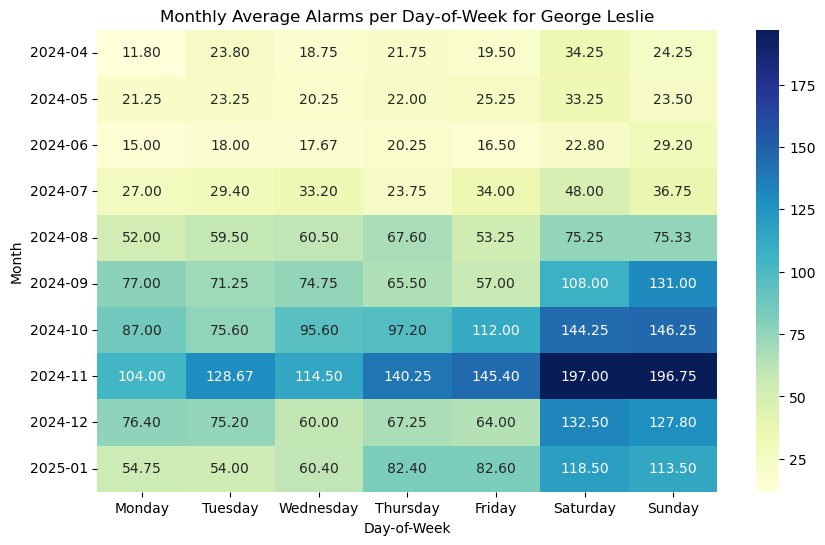

In [94]:
import seaborn as sns

# Display the monthly average alarms per day-of-week sorted by month and day_of_week
print(monthly_day_avg.sort_values(['month', 'day_of_week']))

# Create a pivot table from the monthly_day_avg DataFrame
monthly_pivot = monthly_day_avg.pivot(index='month', columns='day_of_week', values='alarms')

# Reorder the columns so they appear from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_pivot = monthly_pivot[day_order]

print(monthly_pivot)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Monthly Average Alarms per Day-of-Week for George Leslie")
plt.ylabel("Month")
plt.xlabel("Day-of-Week")
plt.show()

In [ ]:
sites_list = [
    "Strathclyde Park",
    "Bleachfield SPS",
    "Palnackie Harbour",
    "Camp Slipway",
    "Ross Priory WTW",
    "Provost Driver Court",
    "Glenkiln Reservoir",
    "Mountjoy Terrace",
    "Touch Reservoir",
    "Wishaw Road",
    "Meadowhead Pipe Repair",
    "Afton Peatland Regeneration",
    "Gladhouse Reservoir",
    "Scotswood Busby"
]

# Filter the matching_sites DataFrame for the given sites
df_sites = matching_sites[matching_sites["Site Name"].isin(sites_list)].copy()

# Ensure the Event Date is converted to datetime
df_sites["Event Date_dt"] = pd.to_datetime(df_sites["Event Date"], format='%d/%m/%Y', errors='coerce')

# Create a 'week' column representing the week period of each event
df_sites["week"] = df_sites["Event Date_dt"].dt.to_period('W')

# Count alarms per site/week
weekly_counts = df_sites.groupby(["Site Name", "week"]).size().reset_index(name="alarms")

# Compute the average alarms per week for each site
avg_alarms_week = weekly_counts.groupby("Site Name")["alarms"].mean()

print("Average alarms per week for each site:")
print(avg_alarms_week)

In [95]:
import matplotlib.pyplot as plt

# Ensure 'Event Date_dt' exists in matching_sites by converting the 'Event Date' column to datetime
matching_sites["Event Date_dt"] = pd.to_datetime(matching_sites["Event Date"], format='%d/%m/%Y', errors="coerce")

# Compute daily alarm counts per site from matching_sites
daily_counts_sites = matching_sites.groupby(["Site Name", "Event Date_dt"]).size().reset_index(name="alarms")

# Get the list of matched sites (14 sites)
sites = list(matched_site_names)

# Set up subplots (4 columns; calculate rows accordingly)
n_sites = len(sites)
ncols = 4
nrows = (n_sites + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3), squeeze=False)
axes = axes.flatten()

for i, site in enumerate(sites):
    ax = axes[i]
    site_data = daily_counts_sites[daily_counts_sites["Site Name"] == site].sort_values("Event Date_dt")
    ax.plot(site_data["Event Date_dt"], site_data["alarms"], marker="o", linestyle="-")
    avg_alarm = site_data["alarms"].mean()
    ax.axhline(avg_alarm, color="red", linestyle="--", label=f'Avg: {avg_alarm:.1f}')
    ax.set_title(site)
    ax.set_xlabel("Date")
    ax.set_ylabel("Daily Alarm Count")
    ax.legend()

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

KeyError: 'Event Date_dt'